# Plot summaries of auditory fMRI responses
## (Figure 7, Extended Data Figure 10)

The variance explained for each voxel for each split of data is saved within the "regression_results/natsound_activations/" directory for each model (and is included in the github repo).  

This notebook loads in the data, computes the voxel and participant medians, and performs the leave-one-participant out anlaysis to determine the "best layer" for each set of voxels. 

The regression or RSA value for this "best layer" is plotted against the metamer recognition at that layer.  

In [1]:
import numpy as np
from scipy.io import loadmat
import pickle as pckl
import os

import matplotlib.pylab as plt
import matplotlib
%matplotlib inline

import sys

from model_analysis_folders import all_model_info, color_model_info

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import scipy.stats

import seaborn as sns
import pandas as pd

from notebooks.aud_fmri_notebook_helpers import * 
from notebooks.notebook_helpers import responses_network_by_layer_mat, combined_experiment_response_dictionaries, unpack_experiment_mat

import urllib
import json

# Load in the metamer data and the fMRI data

In [2]:
all_networks_and_layers = all_model_info.ALL_NETWORKS_AND_LAYERS_AUDIO
models_to_plot = color_model_info.audio_models_to_plot
model_colors = color_model_info.audio_model_colors
model_style_dict = color_model_info.audio_model_style_dict

In [3]:
experiment_list = [1,3,4,6,7,8]

all_experiment_dictionaries = []

for exp_num in experiment_list:
    experiment_name = all_model_info.TURK_AUDIO_EXPERIMENTS_GROUPINGS['experiment_%d'%exp_num]['paper_experiment_name']
    jsin_configs = all_model_info.TURK_AUDIO_EXPERIMENTS_GROUPINGS['experiment_%d'%exp_num]['experiment_params_web']

    with urllib.request.urlopen(jsin_configs) as url:
        experiment_params = json.loads(url.read().decode())

    plot_model_order = experiment_params['experiment_info']['networks']
    
    exp_response_dict = {}
    for n_idx, network in enumerate(experiment_params['experiment_info']['networks']):
        participant_data_matrix, model_layers, conditions, participants = unpack_experiment_mat(
            '../AuditoryBehavioralExperiments/EXPERIMENT_%d/AudioExperiment%d_network_vs_humans_datamatrix_%s_public.mat'%(exp_num, exp_num, network))
        
        exp_response_dict[network] = responses_network_by_layer_mat(participant_data_matrix, model_layers, conditions, experiment_params)

    all_experiment_dictionaries.append(exp_response_dict)

combined_experiment_dict = combined_experiment_response_dictionaries(all_experiment_dictionaries)
   

# Make plot for the Auditory Regression Analysis 
# Figure 7D

<Figure size 1080x216 with 0 Axes>

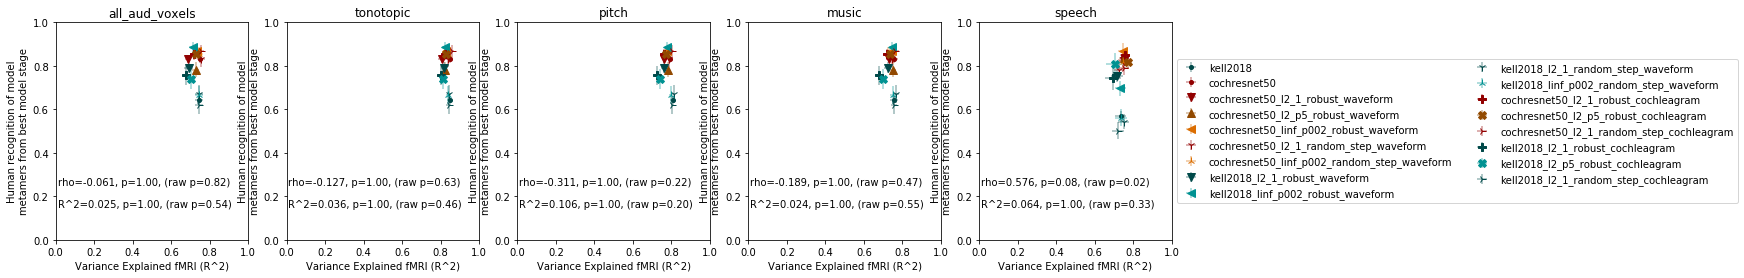

In [4]:
save_best_layer_names = plot_roi_analysis_for_models(models_to_plot,
                             model_colors,
                             model_style_dict,
                             all_networks_and_layers,
                             combined_experiment_dict,
                             roi_names=['all_aud_voxels'] + ['tonotopic', 'pitch', 'music', 'speech'],
                                   )

# Make plot for the RSA Analysis
# Extended Data Figure 10

<Figure size 1080x216 with 0 Axes>

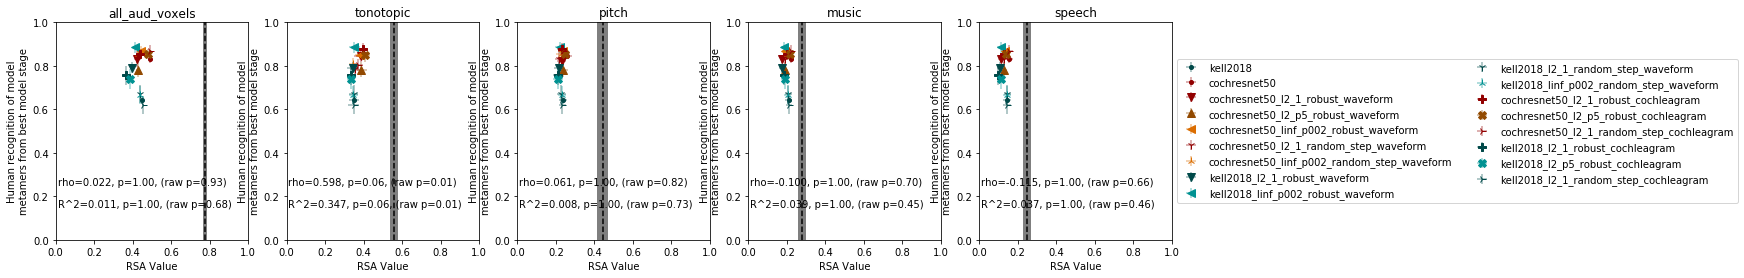

In [5]:
save_best_layer_names = plot_roi_analysis_for_models(models_to_plot,
                             model_colors,
                             model_style_dict,
                             all_networks_and_layers,
                             combined_experiment_dict,
                             roi_names=['all_aud_voxels'] + ['tonotopic', 'pitch', 'music', 'speech'],
                             analysis_type='rsa',
                                   )
